In [6]:
from scipy.stats import gamma, binom
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [7]:
a = 10
b = 2000

In [8]:
n_sales_x = list(range(0, 30))
sales_x = np.linspace(0, 40000, 201)

In [9]:
n_sales = binom.rvs(30, .2, size=1000)
sales = gamma.rvs(a=a, scale=1/b)

In [10]:
def plot_line(x, y):
    sns.lineplot(x=x, y=y)

    plt.show()

In [11]:
n_sales_y = binom.pmf(n_sales_x, n=30, p=.2)
sales_graph_y = gamma.pdf(sales_x, a=a, scale=b)

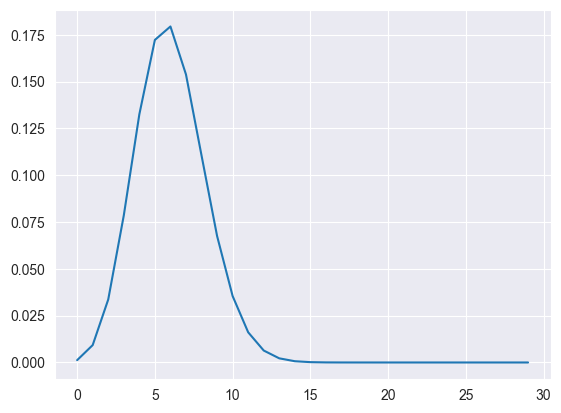

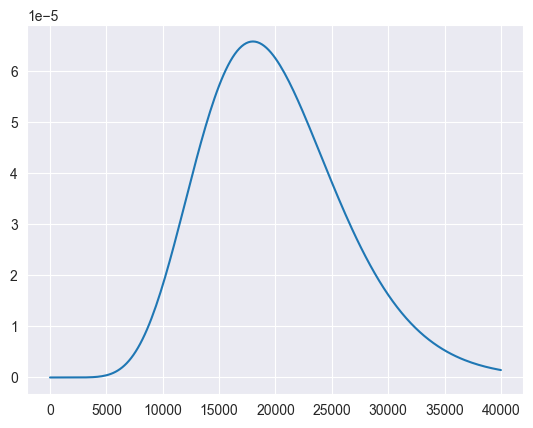

In [12]:
plot_line(x=n_sales_x, y=n_sales_y)
plot_line(x=sales_x, y=sales_graph_y)

In [13]:
# Next step is to create convolutions - i.e. the PDFs that come from RV calculus
def pdf_product_convolution_discrete_continuous(z, pmf_d, pdf_c, domain_d):
    return np.sum([pmf_d(x) * pdf_c(z / (x + 1e-6)) * (1/np.abs(x + 1e-6)) for x in domain_d])

def cdf_product_convolution_discrete_continuous(z, pmf_d, cdf_c, domain_d):
    return np.sum([pmf_d(x) * cdf_c(z / (x + 1e-6)) for x in domain_d])

In [14]:
print(pdf_product_convolution_discrete_continuous(10000, pmf_d=lambda l1: binom.pmf(l1, n=30, p=.2), pdf_c=lambda l2: gamma.pdf(l2, a=a, scale=b), domain_d=list(range(0, 30))))

1.764097539575413e-07


# Product Convolution PDF

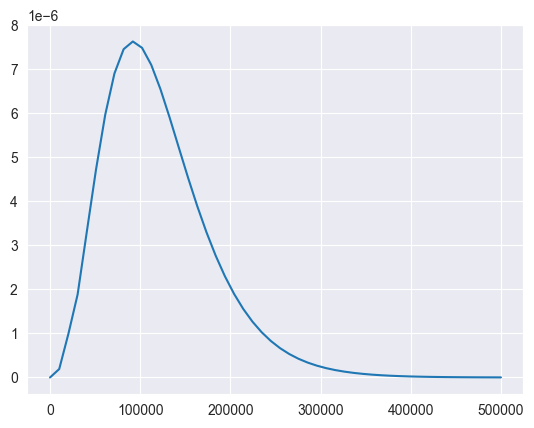

In [15]:
x = np.linspace(0, 500000)
y = [pdf_product_convolution_discrete_continuous(z=x_, pmf_d=lambda l1: binom.pmf(l1, n=30, p=.2), pdf_c=lambda l2: gamma.pdf(l2, a=a, scale=b), domain_d=list(range(30))) for x_ in x]
plot_line(x=x, y=y)

# Product Convolution CDF

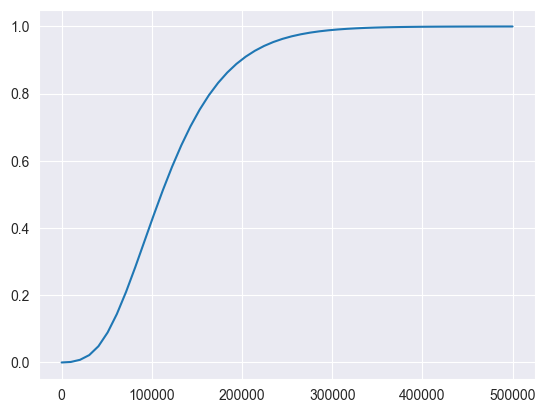

In [16]:
x = np.linspace(0, 500000)
y = [cdf_product_convolution_discrete_continuous(z=x_, pmf_d=lambda l1: binom.pmf(l1, n=30, p=.2), cdf_c=lambda l2: gamma.cdf(l2, a=a, scale=b), domain_d=list(range(30))) for x_ in x]
plot_line(x=x, y=y)